In [1]:
import pandas as pd
from Network_cluster import Net_Spectral_clustering,Net_Hierarchical_clustering,Net_Fast_Unfolding
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq,kmeans,whiten 
import matplotlib as mlp
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

# 1 数据准备

In [2]:
df_doctor_order = pd.read_csv('visit_order.csv')
df_doctor_order.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,HOSPITAL_CODE,PATIENT_ID,PATIENT_NO,INPATIENT_NO,SERIAL_NO,ITEM_SNOMED,SN_COMMENT,ITEM_CODE,MO_NAME,EMP_NO,...,EXEC_DPNM,UPDATED_ON,SEQ_ID,SYS_EMP_NO,DATA_VERSION,SYS_MO_NAME,SYS_DOSE_UNIT,SYS_UNIT,SYS_USE_NAME,ITEM_CLASS
0,12440100455344205E,0081041264,581043,ZY070000581043,196256095,NaN,NaN,Y00000004991,善存片,1968,...,呼吸内科1(沿江),05-6月 -18 03.15.09.000000 下午,43813,NaN,0,NaN,NaN,NaN,口服,西药
1,12440100455344205E,0081265768,595649,ZY010000595649,194027186,NaN,NaN,F00002227295,一次性使用输液器（超低密度聚乙烯精密输液器（带螺口））,6617,...,呼吸内科2(沿江),05-6月 -18 03.15.09.000000 下午,44335,NaN,0,NaN,NaN,NaN,NaN,治疗
2,12440100455344205E,0080234445,353163,ZY090000353163,185582066,NaN,NaN,18435,九项呼吸道感染病原体IgM抗体检测,1730,...,呼研所实验部(沿江),05-6月 -18 03.15.09.000000 下午,44807,NaN,0,NaN,NaN,NaN,NaN,检验
3,12440100455344205E,0000764987,606770,ZY010000606770,202544697,NaN,NaN,F00002204394,动脉采血,2032,...,NaN,05-6月 -18 03.15.09.000000 下午,44824,NaN,0,NaN,NaN,NaN,NaN,治疗
4,12440100455344205E,0000749211,321757,ZY060000321757,85493264,NaN,NaN,F00002204391,静脉采血,712,...,NaN,05-6月 -18 03.15.09.000000 下午,45318,NaN,0,NaN,NaN,NaN,NaN,治疗


In [3]:
df_extracted = df_doctor_order[['INPATIENT_NO','ITEM_CODE']]
df_extracted.head()

,INPATIENT_NO,ITEM_CODE
0,ZY070000581043,Y00000004991
1,ZY010000595649,F00002227295
2,ZY090000353163,18435
3,ZY010000606770,F00002204394
4,ZY060000321757,F00002204391


# 2 kmeans 聚类尝试

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

kmeans = KMeans(n_clusters=10, random_state=10).fit(df_extracted)
df_extracted['jllable']=kmeans.labels_
df_count_type=df_extracted.groupby('jllable').apply(np.size)
 

ValueError: could not convert string to float: 'F00000181791'

In [23]:
##各个类别的数目
df_count_type

jllable
0     1428
1    17133
2    21384
3     1200
4     9618
5     1776
6      624
7     4086
8     9321
9     9885
dtype: int64

In [24]:
##聚类中心
kmeans.cluster_centers_

array([[ 53638.87395,  22410.82563,      0.0084 ],
       [ 20537.68657,   2837.31606,      1.     ],
       [ 53890.37486,    884.10003,      0.     ],
       [ 56804.8525 , 102879.5725 ,      2.     ],
       [ 77587.28821,   4167.89551,      0.     ],
       [ 16700.12331,  21948.14696,      1.     ],
       [ 16019.13942, 102223.4375 ,      2.     ],
       [ 37991.7746 ,   2917.91189,      0.52863],
       [ 53694.7673 ,   8714.83457,      0.     ],
       [  9291.1214 ,   2664.41062,      1.     ]])

In [25]:
##新的dataframe，命名为new_df ，并输出到本地，命名为new_df.csv。
new_df=df_extracted[:]
new_df
new_df.to_csv('new_df.csv')

In [26]:
##将用于聚类的数据的特征的维度降至2维，并输出降维后的数据，形成一个dataframe名字new_pca
pca = PCA(n_components=2)
new_pca = pd.DataFrame(pca.fit_transform(new_df))

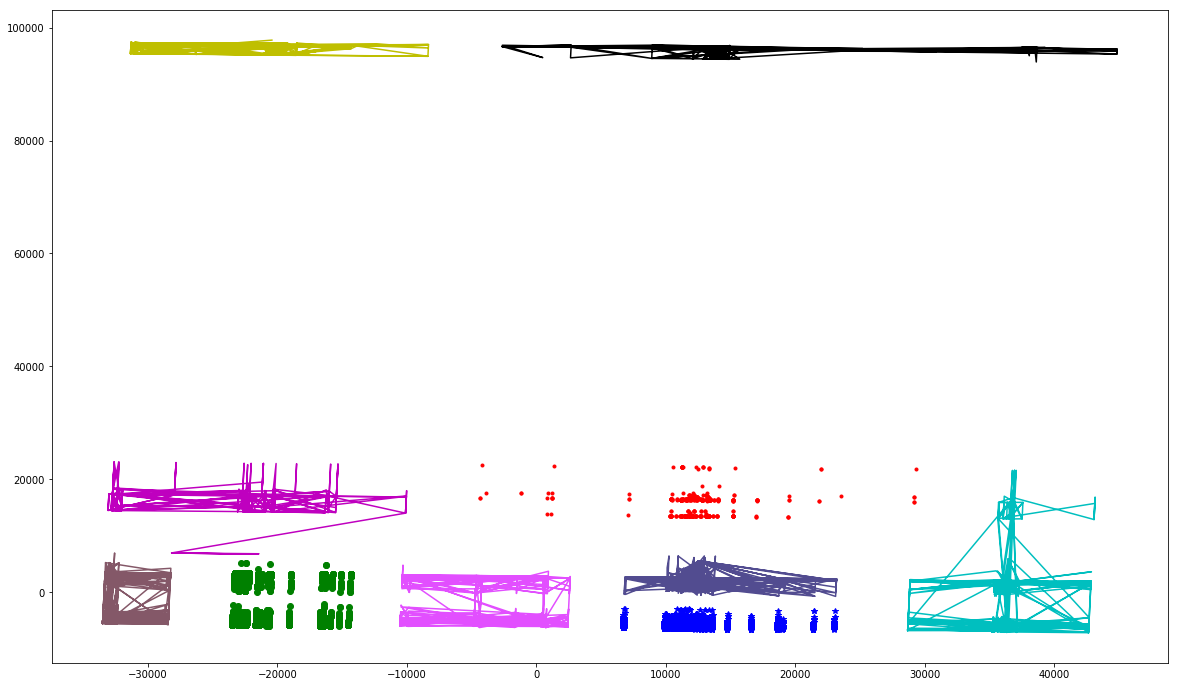

In [31]:
 
##可视化
fig = plt.figure(figsize=(20,12))
d = new_pca[new_df['jllable'] == 0]
plt.plot(d[0], d[1], 'r.')
d = new_pca[new_df['jllable'] == 1]
plt.plot(d[0], d[1], 'go')
d = new_pca[new_df['jllable'] == 2]
plt.plot(d[0], d[1], 'b*')
d = new_pca[new_df['jllable'] == 3]
plt.plot(d[0], d[1], 'k')
d = new_pca[new_df['jllable'] == 4]
plt.plot(d[0], d[1], 'c')
d = new_pca[new_df['jllable'] == 5]
plt.plot(d[0], d[1], 'm')
d = new_pca[new_df['jllable'] == 6]
plt.plot(d[0], d[1], 'y')
d = new_pca[new_df['jllable'] == 7]
plt.plot(d[0], d[1], '#e24fff')
d = new_pca[new_df['jllable'] == 8]
plt.plot(d[0], d[1], '#524C90')
d = new_pca[new_df['jllable'] == 9]
plt.plot(d[0], d[1], '#845868')
plt.gcf().savefig('kmeans.png')
plt.show()

In [7]:
df_extracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25485 entries, 0 to 25484
Data columns (total 2 columns):
INPATIENT_NO    25485 non-null int64
ITEM_CODE       25485 non-null int64
dtypes: int64(2)
memory usage: 398.3 KB


# 3 谱聚类尝试

In [4]:
df_grouped = df_extracted.groupby('INPATIENT_NO', group_keys=False)
print(df_grouped.groups)

{'ZY010000359652': Int64Index([  5159,  12265,  12654,  16262,  26008,  37857,  41793,  45337,
             45608,  50843,  57682,  57950,  59126,  64856,  69955,  74861,
             75369,  76742,  78056,  79764,  83499,  84730,  87677,  88342,
             96746,  98991, 111684, 113087, 116762, 123115, 134246, 138943,
            139261, 143532, 145951, 154579, 160135, 178254, 193307, 193588,
            193845, 213661, 215765, 223177, 232258, 233952, 236801, 245476,
            246992, 260676, 262375, 262823, 266695, 274922, 280490, 285415,
            288531, 289158, 291651, 296637, 296748],
           dtype='int64'), 'ZY010000360978': Int64Index([  1948,   2677,   6444,  13378,  14431,  15404,  18562,  20049,
             23478,  26364,
            ...
            283604, 285844, 286678, 289245, 291700, 292652, 293330, 298664,
            301147, 301192],
           dtype='int64', length=115), 'ZY010000361765': Int64Index([   333,    898,   1468,   3012,   3073,   3281,   7080,  

In [5]:
len(df_grouped.groups)

1511

In [8]:
df_list = list(df_grouped)
print(df_list[:100])

[('ZY010000359652',           INPATIENT_NO     ITEM_CODE
5159    ZY010000359652  F00002212420
12265   ZY010000359652  Y00000002182
12654   ZY010000359652  F00002207304
16262   ZY010000359652         17944
26008   ZY010000359652  Y00000002100
37857   ZY010000359652         18107
41793   ZY010000359652         17708
45337   ZY010000359652  F00002204352
45608   ZY010000359652  F00002212420
50843   ZY010000359652         16094
57682   ZY010000359652  F00002204391
57950   ZY010000359652           999
59126   ZY010000359652  Y00000018395
64856   ZY010000359652         16175
69955   ZY010000359652  F00002212421
74861   ZY010000359652  F00002204440
75369   ZY010000359652         17132
76742   ZY010000359652  Y00000018345
78056   ZY010000359652         16094
79764   ZY010000359652         17276
83499   ZY010000359652         17134
84730   ZY010000359652         17078
87677   ZY010000359652         17100
88342   ZY010000359652  Y00000018880
96746   ZY010000359652         17569
98991   ZY01000035

In [11]:
nparray_itemCode = []
nparray_inpatient_no = []
for patient in df_list:
    nparray_itemCode.append(np.array(patient[1]['ITEM_CODE']))
    nparray_inpatient_no.append(np.array(patient[0]))
                                
nparray_itemCode = np.array(nparray_itemCode)

np.save("nparray_itemCode.npy",nparray_itemCode)

nparray_itemCode[:100]

array([array(['F00002212420', 'Y00000002182', 'F00002207304', '17944',
       'Y00000002100', '18107', '17708', 'F00002204352', 'F00002212420',
       '16094', 'F00002204391', '999', 'Y00000018395', '16175',
       'F00002212421', 'F00002204440', '17132', 'Y00000018345', '16094',
       '17276', '17134', '17078', '17100', 'Y00000018880', '17569', '999',
       'F00002207305', 'Y00000018752', '18220', 'F00002204391', '17136',
       'F00002212422', 'Y00000018395', '17717', '999', 'F00002212422',
       '17275', 'F00002204391', '17686', '17146', '16888', 'F00002204391',
       '17099', '16892', 'Y00000019238', 'F00002212421', 'F00002212422',
       'Y00000002188', '17065', 'F00002204391', 'F00002204391', '16094',
       'F00002212422', '16298', 'F00002212423', 'F00002212420',
       'F00002212422', '16136', '17261', 'F00002212423', 'F00002204391'],
      dtype=object),
       array(['F00002204352', '17569', 'Y00000001009', 'F00002204346', '17868',
       'Y00000018329', '17146', 'F000022

In [12]:
nparray_itemCode = np.load("nparray_itemCode.npy")

In [13]:
nparray_inpatient_no = np.array(nparray_inpatient_no)
np.save('nparray_inpatient_no.npy',nparray_inpatient_no)

nparray_inpatient_no

array(['ZY010000359652', 'ZY010000360978', 'ZY010000361765', ...,
       'ZY290000287627', 'ZY300000287627', 'ZY310000287627'], dtype='<U14')

In [14]:
nparray_inpatient_no = np.load('nparray_inpatient_no.npy')

In [15]:
nparray_similarity_matrix = []
for patient_items01 in nparray_itemCode:
    patient_similarity = []
    for patient_items02 in nparray_itemCode:
        patient_all_items = set(patient_items01) | set(patient_items02)
        patient_same_items = set(patient_items01) & set(patient_items02)
        similarity = len(patient_same_items) / len(patient_all_items)
        patient_similarity.append(similarity)
    nparray_similarity_matrix.append(np.array(patient_similarity))
    
nparray_similarity_matrix = np.array(nparray_similarity_matrix)
np.save('nparray_similarity_matrix.npy',nparray_similarity_matrix)

nparray_similarity_matrix[:100]

array([[1.     , 0.25882, 0.23134, ..., 0.22807, 0.26606, 0.22414],
       [0.25882, 1.     , 0.18987, ..., 0.3252 , 0.23846, 0.2406 ],
       [0.23134, 0.18987, 1.     , ..., 0.22099, 0.29586, 0.28902],
       ...,
       [0.24272, 0.19841, 0.32278, ..., 0.32374, 0.33824, 0.31915],
       [0.3012 , 0.21296, 0.27703, ..., 0.34426, 0.36134, 0.328  ],
       [0.24752, 0.192  , 0.30189, ..., 0.31884, 0.34328, 0.32374]])

In [16]:
nparray_similarity_matrix = np.load('nparray_similarity_matrix.npy')

IndexError: too many indices for array

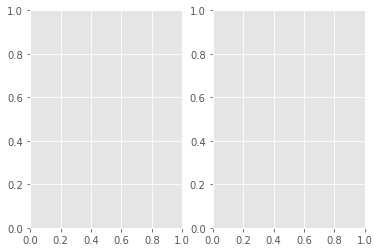

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import normalize
 
 
def similarity_function(points):
    """
    相似性函数，利用径向基核函数计算相似性矩阵，对角线元素置为０
    对角线元素为什么要置为０我也不清楚，但是论文里是这么说的
    :param points:
    :return:
    """
    res = rbf_kernel(points)
    for i in range(len(res)):
        res[i, i] = 0
    return res
 
 
def spectral_clustering(points, k, W):
    """
    谱聚类
    :param points: 样本点
    :param k: 聚类个数
    :return: 聚类结果
    """
#     W = similarity_function(points)
    # 度矩阵D可以从相似度矩阵W得到，这里计算的是D^(-1/2)
    # D = np.diag(np.sum(W, axis=1))
    # Dn = np.sqrt(LA.inv(D))
    # 本来应该像上面那样写，我做了点数学变换，写成了下面一行
    Dn = np.diag(np.power(np.sum(W, axis=1), -0.5))
    # 拉普拉斯矩阵：L=Dn*(D-W)*Dn=I-Dn*W*Dn
    # 也是做了数学变换的，简写为下面一行
    L = np.eye(len(points)) - np.dot(np.dot(Dn, W), Dn)
    eigvals, eigvecs = LA.eig(L)
    # 前k小的特征值对应的索引，argsort函数
    indices = np.argsort(eigvals)[:k]
    # 取出前k小的特征值对应的特征向量，并进行正则化
    k_smallest_eigenvectors = normalize(eigvecs[:, indices])
    # 利用KMeans进行聚类
    return KMeans(n_clusters=k).fit_predict(k_smallest_eigenvectors)
 
 
# X, y = make_blobs()
# X = np.nan_to_num(np.array(df_extracted))
X = np.array(nparray_itemCode)
labels = spectral_clustering(X, 3, nparray_similarity_matrix)
 
# 画图
plt.style.use('ggplot')
# 原数据
fig, (ax0, ax1) = plt.subplots(ncols=2)
ax0.scatter(X[:, 0], X[:, 1], c=y)
ax0.set_title('raw data')
# 谱聚类结果
ax1.scatter(X[:, 0], X[:, 1], c=labels)
ax1.set_title('Spectral Clustering')
plt.gcf().savefig('spectral_cluster.png')
plt.show()

# 4 Kmeans聚类简版

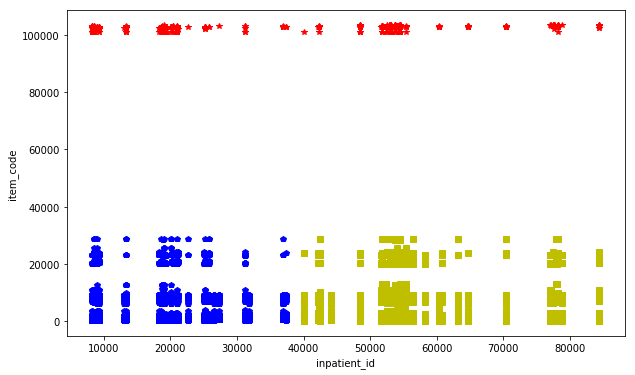

In [21]:
import numpy
#转换数据格式
tmp=numpy.array(df_extracted)
#调用python关于机器学习sklearn库中的KMeans
from sklearn.cluster import KMeans
#设置分为3类，并训练数据
kms=KMeans(n_clusters=3)
y=kms.fit_predict(tmp)
#将分类结果以散点图形式展示
fig = plt.figure(figsize=(10,6))
plt.xlabel('inpatient_id')
plt.ylabel('item_code')
for i in range(0,len(y)):
    if(y[i]==0):      
        plt.plot(tmp[i,0],tmp[i,1],"*r")
    elif(y[i]==1):      
        plt.plot(tmp[i,0],tmp[i,1],"sy")
    elif(y[i]==2):       
        plt.plot(tmp[i,0],tmp[i,1],"pb")
plt.show()


# 5 网络层次聚类

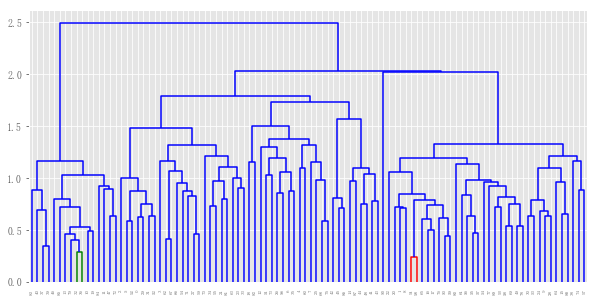

In [37]:
hierachical_clusting_result = Net_Hierarchical_clustering(pd.DataFrame(nparray_similarity_matrix), cutoff = 0.3,metric_name='jaccard')
np.save("hierachical_clusting_result.npy",hierachical_clusting_result)

In [39]:
hierachical_clusting_result = np.load('hierachical_clusting_result.npy')
hierachical_clusting_result

array([list([[32, 36], [98, 91]]),
       array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0.])],
      dtype=object)

# 6 谱聚类示例

In [13]:
import numpy as np
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=500, n_features=6, centers=5, cluster_std=[0.4, 0.3, 0.4, 0.3, 0.4], random_state=11)
X

array([[-7.76325, -8.84656,  4.27902,  2.24092, -9.01179, -0.3842 ],
       [-6.73328, -9.41316, -0.79361,  4.74079, -1.07047, -0.74584],
       [-6.95129, -9.51077, -0.84526,  4.10275, -1.28879,  0.14329],
       ...,
       [-3.52247, -6.80041,  4.91296,  6.27508, -3.01961, -3.42771],
       [ 7.76664,  7.82404, -6.83186,  2.88729, -9.76742, -7.50407],
       [ 8.40229,  7.63185, -6.50529,  3.36424, -9.48794, -7.73366]])

In [14]:
y

array([4, 0, 0, 2, 0, 0, 1, 2, 0, 0, 4, 4, 0, 0, 0, 2, 0, 1, 1, 1, 3, 3,
       4, 1, 3, 2, 2, 2, 0, 4, 4, 1, 0, 0, 1, 4, 4, 2, 3, 2, 2, 1, 1, 0,
       2, 3, 4, 4, 1, 3, 3, 4, 2, 2, 4, 1, 3, 3, 2, 2, 4, 3, 3, 3, 1, 0,
       2, 3, 3, 2, 3, 1, 1, 4, 0, 1, 2, 1, 2, 4, 0, 2, 3, 3, 2, 0, 0, 0,
       0, 4, 2, 0, 0, 3, 2, 1, 1, 0, 4, 0, 2, 4, 2, 4, 1, 2, 4, 4, 0, 1,
       0, 4, 2, 2, 2, 3, 4, 2, 2, 0, 4, 0, 1, 0, 0, 4, 4, 1, 4, 2, 3, 2,
       0, 3, 1, 1, 1, 1, 0, 1, 3, 4, 3, 3, 3, 3, 3, 4, 2, 1, 3, 4, 1, 4,
       2, 3, 1, 1, 1, 3, 0, 1, 4, 2, 3, 4, 2, 2, 1, 3, 3, 0, 1, 2, 2, 1,
       2, 3, 3, 2, 2, 0, 2, 0, 1, 0, 4, 0, 3, 1, 3, 1, 3, 0, 2, 4, 0, 2,
       4, 1, 3, 3, 4, 3, 4, 2, 3, 0, 2, 3, 1, 4, 1, 0, 2, 4, 3, 3, 2, 3,
       1, 1, 4, 1, 4, 4, 0, 4, 0, 1, 0, 1, 4, 3, 1, 2, 0, 1, 0, 0, 3, 0,
       1, 1, 0, 2, 1, 4, 2, 2, 4, 0, 2, 3, 0, 1, 3, 1, 1, 4, 1, 4, 1, 1,
       1, 3, 4, 4, 2, 0, 3, 3, 2, 4, 1, 0, 1, 4, 0, 4, 2, 3, 0, 1, 4, 1,
       3, 2, 4, 3, 4, 3, 3, 1, 3, 3, 3, 2, 1, 4, 4,

In [15]:
from sklearn.cluster import SpectralClustering
y_pred = SpectralClustering().fit_predict(X)
from sklearn import metrics
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score 14908.932502611722


In [12]:
for index, gamma in enumerate((0.01,0.1,1,10)):
    for index, k in enumerate((3,4,5,6)):
        y_pred = SpectralClustering(n_clusters=k, gamma=gamma).fit_predict(X)
        print("Calinski-Harabasz Score with gamma=", gamma, "n_clusters=", k,"score:", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score with gamma= 0.01 n_clusters= 3 score: 1979.7709609161868
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 4 score: 3154.0184121901607
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 5 score: 23410.63894999138
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 6 score: 19303.734087657893
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 3 score: 1979.7709609161868
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 4 score: 3154.0184121901607
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 5 score: 23410.638949991386
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 6 score: 19427.961894359112
Calinski-Harabasz Score with gamma= 1 n_clusters= 3 score: 1092.169913749734
Calinski-Harabasz Score with gamma= 1 n_clusters= 4 score: 210.83413736826168
Calinski-Harabasz Score with gamma= 1 n_clusters= 5 score: 23410.638949991386
Calinski-Harabasz Score with gamma= 1 n_clusters= 6 score: 19384.965772439966
Calinski-Harabasz Score with gamma=

D:\program\Anaconda\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


 10 n_clusters= 3 score: 41.950682271267375
Calinski-Harabasz Score with gamma= 10 n_clusters= 4 score: 83.98500420863238
Calinski-Harabasz Score with gamma= 10 n_clusters= 5 score: 30.55827447835323
Calinski-Harabasz Score with gamma= 10 n_clusters= 6 score: 47.964806377758066


In [14]:
y_pred = SpectralClustering(gamma=0.1).fit_predict(X)
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score 14961.167933623812


In [19]:
tmp

array([[  9311,   9311,   8562, ...,  78095,  77657,  78095],
       [   391,    292, 101085, ...,   8342,   6758,   9201]], dtype=int64)

# 7 谱聚类尝试2

In [17]:
spectral_clustering_lists, label = Net_Spectral_clustering(pd.DataFrame(nparray_similarity_matrix), nclusters=20, affinity_v='precomputed')
np.save("spectral_clustering_lists.npy",spectral_clustering_lists)
np.save("label.npy",label)
label

D:\program\Anaconda\lib\site-packages\sklearn\cluster\spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


array([ 4,  3,  2, ...,  2, 13,  4])

In [18]:
spectral_clustering_lists = np.load("spectral_clustering_lists.npy")
label = np.load("label.npy")
spectral_clustering_lists

array([list([68, 80, 81, 83, 92, 97, 98, 99, 100, 114, 115, 120, 125, 141, 150, 161, 173, 175, 179, 184, 187, 192, 198, 201, 203, 205, 207, 208, 225, 231, 248, 249, 258, 259, 260, 269, 281, 296, 330, 331, 335, 340, 344, 349, 352, 353, 361, 368, 369, 370, 371, 373, 377, 378, 388, 405, 411, 415, 418, 420, 426, 428, 434, 436, 437, 440, 442, 446, 455, 456, 460, 461, 467, 468, 469, 470, 471, 473, 479, 480, 486, 491, 492, 504, 514, 520, 521, 522, 523, 526, 541, 545, 558, 559, 571, 574, 578, 581, 586, 588, 591, 593, 598, 607, 621, 635, 636, 638, 641, 644, 650, 653, 656, 661, 705, 706, 718, 728, 740, 750, 752, 755, 776, 780, 790, 792, 793, 797, 808, 811, 812, 816, 819, 822, 849, 855, 856, 864, 868, 871, 873, 887, 888, 895, 904, 905, 910, 916, 934, 948, 961, 998, 1042, 1044, 1050, 1051, 1076, 1085, 1101, 1114, 1118, 1124, 1125, 1127, 1165, 1173, 1192, 1203, 1206, 1207, 1208, 1257, 1262, 1272, 1309, 1347, 1380, 1405, 1430, 1449, 1471]),
       list([106, 146, 148, 154, 157, 182, 185, 196, 215, 2

In [ ]:
from sklearn.manifold import TSNE
from time import time

def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
result = tsne.fit_transform(nparray_similarity_matrix)
fig = plot_embedding(result, label, 't-SNE embedding of the digits (time %.2fs)'% (time() - t0))
plt.show(fig)

# 8 Fast Unfolding 尝试

In [ ]:
fast_unfolding_result = Net_Fast_Unfolding(pd.DataFrame(nparray_similarity_matrix))
np.save("fast_unfolding_result.npy",fast_unfolding_result)

In [31]:
fast_unfolding_result = np.load("fast_unfolding_result.npy")

In [36]:
fast_unfolding_result

array([list([[0, 2, 3, 5, 21, 23, 27, 29, 31, 34, 42, 45, 52, 62, 63, 66, 67, 99, 71, 86, 81, 70, 92, 94, 95], [1, 8, 9, 15, 16, 17, 20, 22, 24, 28, 30, 38, 49, 50, 53, 54, 55, 56, 57, 58, 59, 61, 64, 65, 69, 90, 74, 76, 77, 78, 80, 82, 88, 89, 91, 98, 93, 97], [4, 6, 7, 10, 11, 12, 13, 14, 18, 19, 25, 26, 32, 33, 35, 36, 37, 39, 40, 41, 43, 44, 46, 47, 48, 51, 60, 72, 79, 83, 84, 85, 68, 75, 73, 87, 96]]),
       list(['0', '1', '2']), 0.12017635046556303,
       {'0': ['0', '2', '3', '5', '21', '23', '27', '29', '31', '34', '42', '45', '52', '62', '63', '66', '67', '99', '71', '86', '81', '70', '92', '94', '95'], '1': ['1', '8', '9', '15', '16', '17', '20', '22', '24', '28', '30', '38', '49', '50', '53', '54', '55', '56', '57', '58', '59', '61', '64', '65', '69', '90', '74', '76', '77', '78', '80', '82', '88', '89', '91', '98', '93', '97'], '2': ['4', '6', '7', '10', '11', '12', '13', '14', '18', '19', '25', '26', '32', '33', '35', '36', '37', '39', '40', '41', '43', '44', '46', '47'

# 9 根据谱聚类结果对病人对应的医嘱开药有无情况进行格式化类比展示

In [20]:
clustering_count = 0
for clustering in spectral_clustering_lists:
    clustering_count += 1
    print('------------------------- Clustering {} 相似度矩阵 -------------------------------'.format(clustering_count))
    cluster_similarity_matrix = []
    for patient_index in clustering:
#         print(nparray_itemCode[patient_index])
   
        patient_similarity = []
        for patient_index02 in clustering:
            patient_all_items = set(nparray_itemCode[patient_index]) | set(nparray_itemCode[patient_index02])
            patient_same_items = set(nparray_itemCode[patient_index]) & set(nparray_itemCode[patient_index02])
            similarity = len(patient_same_items) / len(patient_all_items)
            patient_similarity.append(similarity)
        cluster_similarity_matrix.append(np.array(patient_similarity))
    
    cluster_similarity_matrix = np.array(cluster_similarity_matrix)
    print(cluster_similarity_matrix)
        

------------------------- Clustering 1 相似度矩阵 -------------------------------
[[1.      0.49074 0.53191 ... 0.58242 0.63095 0.48544]
 [0.49074 1.      0.52252 ... 0.48246 0.45946 0.37984]
 [0.53191 0.52252 1.      ... 0.50495 0.52632 0.4    ]
 ...
 [0.58242 0.48246 0.50495 ... 1.      0.61111 0.46364]
 [0.63095 0.45946 0.52632 ... 0.61111 1.      0.55556]
 [0.48544 0.37984 0.4     ... 0.46364 0.55556 1.     ]]
------------------------- Clustering 2 相似度矩阵 -------------------------------
[[1.      0.44706 0.40686 ... 0.35683 0.36864 0.31551]
 [0.44706 1.      0.36872 ... 0.33668 0.3381  0.32468]
 [0.40686 0.36872 1.      ... 0.44131 0.49767 0.44118]
 ...
 [0.35683 0.33668 0.44131 ... 1.      0.45957 0.37113]
 [0.36864 0.3381  0.49767 ... 0.45957 1.      0.37745]
 [0.31551 0.32468 0.44118 ... 0.37113 0.37745 1.     ]]
------------------------- Clustering 3 相似度矩阵 -------------------------------
[[1.      0.23077 0.27717 ... 0.19617 0.23926 0.22099]
 [0.23077 1.      0.21809 ... 0.17874 0.18

[[1.      0.68571 0.62264 ... 0.64356 0.39552 0.39516]
 [0.68571 1.      0.63393 ... 0.62385 0.44526 0.48387]
 [0.62264 0.63393 1.      ... 0.59259 0.40876 0.47934]
 ...
 [0.64356 0.62385 0.59259 ... 1.      0.43846 0.41803]
 [0.39552 0.44526 0.40876 ... 0.43846 1.      0.4697 ]
 [0.39516 0.48387 0.47934 ... 0.41803 0.4697  1.     ]]
------------------------- Clustering 11 相似度矩阵 -------------------------------
[[1.      0.44179 0.38701 0.37413 0.38575 0.42997 0.38049 0.39895 0.3925
  0.38764 0.35185 0.37808 0.4     0.334   0.32468 0.37037 0.41192 0.38827]
 [0.44179 1.      0.40806 0.38702 0.39905 0.54153 0.36806 0.46073 0.41606
  0.36579 0.35013 0.40879 0.39143 0.36508 0.35101 0.37116 0.44063 0.392  ]
 [0.38701 0.40806 1.      0.57882 0.58416 0.36243 0.51415 0.43294 0.46868
  0.39706 0.47487 0.50763 0.48619 0.50509 0.4398  0.50238 0.4561  0.49608]
 [0.37413 0.38702 0.57882 1.      0.58957 0.33025 0.49574 0.41053 0.54566
  0.39911 0.47945 0.50902 0.45388 0.55039 0.44743 0.53097 0.43355 

In [21]:
set_all_items = set()
for items in nparray_itemCode:
    set_all_items = set_all_items | set(items)
len(set_all_items)

2536

In [25]:
all_items_list = np.array(list(set_all_items))
# all_items_list.astype(np.object)
# np.savetxt("all_items_list.txt",all_items_list, fmt="%d")
np.savetxt("all_items_list.txt",all_items_list, fmt='%s')
all_items_list

array(['Y00000018754', 'Y00000007A53', 'Y00000018477', ..., '17334',
       'Y00000000660', 'Y00000018842'], dtype='<U12')

In [26]:
df_doctor_order.columns

Index(['HOSPITAL_CODE', 'PATIENT_ID', 'PATIENT_NO', 'INPATIENT_NO',
       'SERIAL_NO', 'ITEM_SNOMED', 'SN_COMMENT', 'ITEM_CODE', 'MO_NAME',
       'EMP_NO', 'DOC_NAME', 'TYPE_NAME', 'BASE_DOSE', 'DOSE_UNIT', 'SPECS',
       'DOSE_ONCE', 'DATE_BGN', 'DATE_END', 'TOTAL', 'UNIT', 'FREQ_CODE',
       'FREQUENCY_NAME', 'ADMINISTRATION_CODE', 'USE_NAME', 'MO_NOTE2',
       'OPEN_TIME', 'EXEC_CODE', 'EXEC_DPNM', 'UPDATED_ON', 'SEQ_ID',
       'SYS_EMP_NO', 'DATA_VERSION', 'SYS_MO_NAME', 'SYS_DOSE_UNIT',
       'SYS_UNIT', 'SYS_USE_NAME', 'ITEM_CLASS'],
      dtype='object')

In [27]:
df_codeAndName = df_doctor_order[['ITEM_CODE','MO_NAME','SPECS','USE_NAME']]
# for item_code in all_items_list:
df_codeAndName = df_codeAndName.drop_duplicates(['ITEM_CODE']) 
df_codeAndName.to_csv('itemCodeAndName.csv')
df_codeAndName

,ITEM_CODE,MO_NAME,SPECS,USE_NAME
0,Y00000004991,善存片,复方*60片,口服
1,F00002227295,一次性使用输液器（超低密度聚乙烯精密输液器（带螺口））,NaN,静脉滴注
2,18435,九项呼吸道感染病原体IgM抗体检测,NaN,NaN
3,F00002204394,动脉采血,NaN,NaN
4,F00002204391,静脉采血,NaN,NaN
5,F00002204382,低流量给氧,NaN,NaN
6,16093,一般细菌涂片检查,NaN,NaN
7,17878,血乳酸,NaN,NaN
8,18823,凝血五项,NaN,NaN
9,F00002204440,雾化吸入(氧气雾化),NaN,NaN


# 10 归一化后的ItemCode查看，并将归一后的itemCode写入医嘱明细表normalized_item_code字段

In [4]:
df_itemCodeAfterNormalizaiton = pd.read_excel('itemCodeAfterNormalizaiton.xlsx')
df_itemCodeAfterNormalizaiton.head()

,ITEM_CODE,MO_NAME,SPECS,USE_NAME,标记,药品代码
229465,16349,（1支造影剂10岁以下）静脉肾盂造影IVP,NaN,NaN,非药品不处理,NaN
179259,18992,(3.0T)颈椎MRI平扫,NaN,NaN,非药品不处理,NaN
25081,19068,(3.0T)盆腔MRI增强,NaN,NaN,非药品不处理,NaN
213279,19065,(3.0T)前列腺MRI增强,NaN,NaN,非药品不处理,NaN
230471,19074,(3.0T)上腹部（肝胆脾胰MRI）增强,NaN,NaN,非药品不处理,NaN


In [8]:
pds_itemcode = df_itemCodeAfterNormalizaiton['药品代码']
print(pds_itemcode[:100])

229465    NaN
179259    NaN
25081     NaN
213279    NaN
230471    NaN
225034    NaN
6575      NaN
42861     NaN
171360    NaN
54682     NaN
20495     NaN
4415      NaN
289530    NaN
105195    NaN
153273    NaN
732       NaN
8682      NaN
144668    NaN
288130    NaN
105874    NaN
16839     NaN
76702     NaN
78359     NaN
293758    NaN
137988    NaN
2252      NaN
256441    NaN
264898    NaN
114589    NaN
16786     NaN
         ... 
212465    NaN
91994     NaN
71413     NaN
8920      NaN
1638      NaN
45387     NaN
47842     NaN
188630    NaN
79084     NaN
219968    NaN
246349    NaN
3524      NaN
16894     NaN
255845    NaN
40527     NaN
199000    NaN
36267     NaN
162247    NaN
279856    NaN
114785    NaN
51456     NaN
64683     NaN
280858    NaN
119469    NaN
1052      NaN
5828      NaN
45349     NaN
203439    NaN
129031    NaN
42387     NaN
Name: 药品代码, Length: 100, dtype: object


In [9]:
len(set(pds_itemcode))

681

In [10]:
pds_itemcode.count()

1028

In [11]:
df_doctor_order['normalized_item_code'] = np.nan
df_doctor_order.head()

,HOSPITAL_CODE,PATIENT_ID,PATIENT_NO,INPATIENT_NO,SERIAL_NO,ITEM_SNOMED,SN_COMMENT,ITEM_CODE,MO_NAME,EMP_NO,...,UPDATED_ON,SEQ_ID,SYS_EMP_NO,DATA_VERSION,SYS_MO_NAME,SYS_DOSE_UNIT,SYS_UNIT,SYS_USE_NAME,ITEM_CLASS,normalized_item_code
0,12440100455344205E,0081041264,581043,ZY070000581043,196256095,NaN,NaN,Y00000004991,善存片,1968,...,05-6月 -18 03.15.09.000000 下午,43813,NaN,0,NaN,NaN,NaN,口服,西药,NaN
1,12440100455344205E,0081265768,595649,ZY010000595649,194027186,NaN,NaN,F00002227295,一次性使用输液器（超低密度聚乙烯精密输液器（带螺口））,6617,...,05-6月 -18 03.15.09.000000 下午,44335,NaN,0,NaN,NaN,NaN,NaN,治疗,NaN
2,12440100455344205E,0080234445,353163,ZY090000353163,185582066,NaN,NaN,18435,九项呼吸道感染病原体IgM抗体检测,1730,...,05-6月 -18 03.15.09.000000 下午,44807,NaN,0,NaN,NaN,NaN,NaN,检验,NaN
3,12440100455344205E,0000764987,606770,ZY010000606770,202544697,NaN,NaN,F00002204394,动脉采血,2032,...,05-6月 -18 03.15.09.000000 下午,44824,NaN,0,NaN,NaN,NaN,NaN,治疗,NaN
4,12440100455344205E,0000749211,321757,ZY060000321757,85493264,NaN,NaN,F00002204391,静脉采血,712,...,05-6月 -18 03.15.09.000000 下午,45318,NaN,0,NaN,NaN,NaN,NaN,治疗,NaN


In [12]:
from tqdm import tqdm

for i in tqdm(range(len(df_doctor_order))):
#     print()
#     print(i)
    normalized_index = df_itemCodeAfterNormalizaiton['ITEM_CODE'].isin([df_doctor_order.at[i,'ITEM_CODE']])
#     print(df_doctor_order.at[i,'ITEM_CODE'])
#     print(df_doctor_order.loc[i,'ITEM_CODE'])
#     print(df_itemCodeAfterNormalizaiton.loc[normalized_index, ['药品代码']])
#     print(df_itemCodeAfterNormalizaiton.at[normalized_index, '药品代码'])
#     print(df_itemCodeAfterNormalizaiton[normalized_index]['药品代码'].values[0])
#     break
#     print(df_itemCodeAfterNormalizaiton[normalized_index])
    if len(df_itemCodeAfterNormalizaiton[normalized_index]['药品代码']) != 0 and df_itemCodeAfterNormalizaiton[normalized_index]['药品代码'].values[0] != '':
        norm_code = df_itemCodeAfterNormalizaiton[normalized_index]['药品代码'].values[0]
        df_doctor_order.loc[i,['normalized_item_code']] = norm_code
    else:
        df_doctor_order.loc[i,['normalized_item_code']] = df_doctor_order.at[i,'ITEM_CODE']

df_doctor_order.head()

100%|██████████████████████████████████████████████████████████████████████████| 301322/301322 [50:55<00:00, 98.61it/s]


,HOSPITAL_CODE,PATIENT_ID,PATIENT_NO,INPATIENT_NO,SERIAL_NO,ITEM_SNOMED,SN_COMMENT,ITEM_CODE,MO_NAME,EMP_NO,...,UPDATED_ON,SEQ_ID,SYS_EMP_NO,DATA_VERSION,SYS_MO_NAME,SYS_DOSE_UNIT,SYS_UNIT,SYS_USE_NAME,ITEM_CLASS,normalized_item_code
0,12440100455344205E,0081041264,581043,ZY070000581043,196256095,NaN,NaN,Y00000004991,善存片,1968,...,05-6月 -18 03.15.09.000000 下午,43813,NaN,0,NaN,NaN,NaN,口服,西药,XA11AA-XD185-01
1,12440100455344205E,0081265768,595649,ZY010000595649,194027186,NaN,NaN,F00002227295,一次性使用输液器（超低密度聚乙烯精密输液器（带螺口））,6617,...,05-6月 -18 03.15.09.000000 下午,44335,NaN,0,NaN,NaN,NaN,NaN,治疗,NaN
2,12440100455344205E,0080234445,353163,ZY090000353163,185582066,NaN,NaN,18435,九项呼吸道感染病原体IgM抗体检测,1730,...,05-6月 -18 03.15.09.000000 下午,44807,NaN,0,NaN,NaN,NaN,NaN,检验,18435
3,12440100455344205E,0000764987,606770,ZY010000606770,202544697,NaN,NaN,F00002204394,动脉采血,2032,...,05-6月 -18 03.15.09.000000 下午,44824,NaN,0,NaN,NaN,NaN,NaN,治疗,NaN
4,12440100455344205E,0000749211,321757,ZY060000321757,85493264,NaN,NaN,F00002204391,静脉采血,712,...,05-6月 -18 03.15.09.000000 下午,45318,NaN,0,NaN,NaN,NaN,NaN,治疗,NaN


In [9]:
df_doctor_order.to_csv("visit_order_with_itemcode_normalized.csv",index=True,sep=',')